# Sentiment Analysis using VADER and BERT

## Dataset used
https://www.kaggle.com/datasets/forgetabhi/the-acolyte-reviews-dataset


# Reference:
https://www.kaggle.com/code/yaminh/sentiment-analysis-with-10-transformers/notebook
Do check out this notebook for comparisons of different types of sentiment analysis models!

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("forgetabhi/the-acolyte-reviews-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/forgetabhi/the-acolyte-reviews-dataset/versions/1


In [ ]:
DATA_PATH = "/root/.cache/kagglehub/datasets/forgetabhi/the-acolyte-reviews-dataset/versions/1"

In [ ]:
import pandas as pd

df = pd.read_csv(DATA_PATH+"/The Acolyte-reviews.csv")
df.head()

,Review Title,Review Date,Review Content,User Rating
0,Painful - how can it get this bad?\n,2024-06-10,Take one of the most exciting and expansive fi...,3.0
1,This is laughably bad writing & direction\n,2024-06-05,Who in the holy hell read these scripts and sa...,3.0
2,What happened to the $180 million it cost to ...,2024-06-09,Then I've seen episode one and two of The Acol...,3.0
3,Jar Jar Binks was a museum masterpiece next t...,2024-06-13,Meesa no lika dis doodoo.I mean seriously what...,1.0
4,Complete garbage\n,2024-06-12,I tried to give this series a chance but after...,1.0


In [ ]:
#dependencies
import nltk

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### VADER

reference: https://blog.quantinsti.com/vader-sentiment/

VADER relies on a dictionary that maps words and other numerous lexical features common to sentiment expression in microblogs.

These features include:

A full list of Western-style emoticons ( for example - :D and :P )


Sentiment-related acronyms ( for example - LOL and ROFL )


Commonly used slang with sentiment value ( for example - Nah and meh )




Manually creating a thorough sentiment dictionary is a labour-intensive and sometimes error-prone process. Thus it is no wonder that many Natural Language Processing (NLP) researchers rely so heavily on existing dictionaries as primary resources.


In [ ]:
import time

analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

start_time = time.time()
df['Sentiment'] = df['Review Content'].apply(get_vader_sentiment)
end_time = time.time()
elapsed_time_vader = end_time - start_time

print(f"Time taken to process the dataset: {elapsed_time_vader} seconds")

Time taken to process the dataset: 4.335242033004761 seconds


In [ ]:
df.head()

,Review Title,Review Date,Review Content,User Rating,Sentiment
0,Painful - how can it get this bad?\n,2024-06-10,Take one of the most exciting and expansive fi...,3.0,Positive
1,This is laughably bad writing & direction\n,2024-06-05,Who in the holy hell read these scripts and sa...,3.0,Negative
2,What happened to the $180 million it cost to ...,2024-06-09,Then I've seen episode one and two of The Acol...,3.0,Negative
3,Jar Jar Binks was a museum masterpiece next t...,2024-06-13,Meesa no lika dis doodoo.I mean seriously what...,1.0,Negative
4,Complete garbage\n,2024-06-12,I tried to give this series a chance but after...,1.0,Negative


In [ ]:
df['Sentiment'].value_counts()

,count
Sentiment,
Negative,929
Positive,552
Neutral,12


([<matplotlib.patches.Wedge at 0x7cffa45eca10>,
 [Text(-0.4121148785456688, 1.0198829966625038, 'Negative'),
  Text(0.3862335134280439, -1.029962947442785, 'Positive'),
  Text(1.0996493381773036, -0.027772883289608703, 'Neutral')],
 [Text(-0.22478993375218295, 0.5562998163613657, '62.2%'),
  Text(0.21067282550620575, -0.5617979713324281, '37.0%'),
  Text(0.5998087299148929, -0.015148845430695654, '0.8%')])

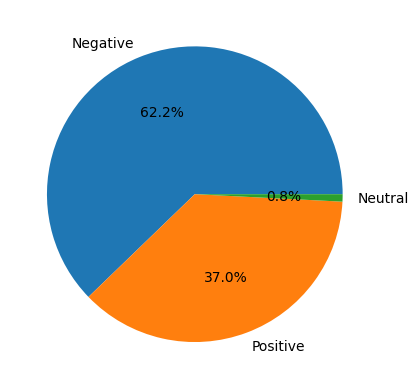

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df['Sentiment'].value_counts(), labels=df['Sentiment'].value_counts().index, autopct='%1.1f%%')

### Material to learn about Deep Learning models in NLP
BERT-

Prerequisites for BERT-
Deep Learning, RNNs, Transformer basics
https://www.youtube.com/watch?v=ioGry-89gqE
https://www.youtube.com/watch?v=t45S_MwAcOw
https://www.kaggle.com/code/prakharrathi25/sentiment-analysis-using-bert


## Word Cloud


In [ ]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

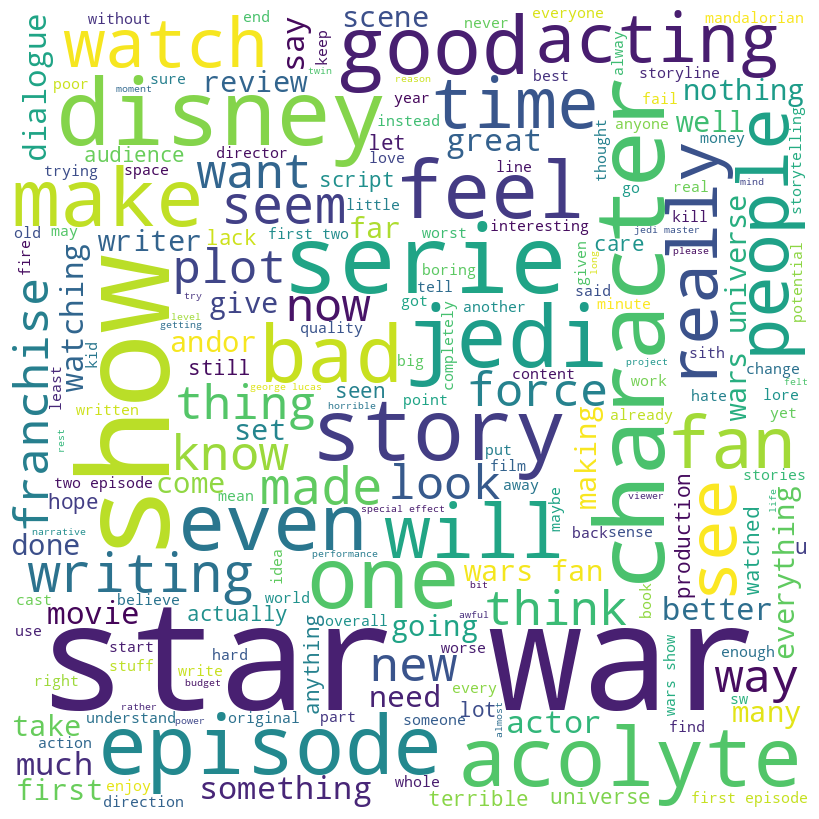

In [ ]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df['Review Content']:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


## BERT
reference: https://www.kaggle.com/code/yaminh/sentiment-analysis-with-10-transformers/input
https://www.kaggle.com/code/harshjain123/bert-for-everyone-tutorial-implementation


distilbert-base-uncased-finetuned-sst-2-english


DistilBERT is a transformers model, smaller and faster than BERT, which was pretrained on the same corpus in a self-supervised fashion, using the BERT base model as a teacher. This means it was pretrained on the raw texts only, with no humans labelling them in any way (which is why it can use lots of publicly available data) with an automatic process to generate inputs and labels from those texts using the BERT base model


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
sentiment_pipeline = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english', tokenizer=tokenizer)

def truncate_text(text, max_length=512):
    return text[:max_length]

def get_sentiment(text):
    truncated_text = truncate_text(text)
    result = sentiment_pipeline(truncated_text)[0]
    return result['label']

start_time = time.time()
df['SentimentBert'] = df['Review Content'].apply(get_sentiment)
end_time = time.time()
elapsed_time_distilbert_base_uncased = end_time - start_time

print(f"Time taken to process the dataset: {elapsed_time_distilbert_base_uncased} seconds")

Device set to use cuda:0


Time taken to process the dataset: 8.421236991882324 seconds


In [ ]:
df.head()

,Review Title,Review Date,Review Content,User Rating,Sentiment,Sentiment4,SentimentBert
0,Painful - how can it get this bad?\n,2024-06-10,Take one of the most exciting and expansive fi...,3.0,Positive,NEGATIVE,NEGATIVE
1,This is laughably bad writing & direction\n,2024-06-05,Who in the holy hell read these scripts and sa...,3.0,Negative,NEGATIVE,NEGATIVE
2,What happened to the $180 million it cost to ...,2024-06-09,Then I've seen episode one and two of The Acol...,3.0,Negative,NEGATIVE,NEGATIVE
3,Jar Jar Binks was a museum masterpiece next t...,2024-06-13,Meesa no lika dis doodoo.I mean seriously what...,1.0,Negative,NEGATIVE,NEGATIVE
4,Complete garbage\n,2024-06-12,I tried to give this series a chance but after...,1.0,Negative,NEGATIVE,NEGATIVE


In [ ]:
df['SentimentBert'] = df['SentimentBert'].map({'NEGATIVE': 'Negative', 'POSITIVE': 'Positive', 'NEUTRAL':'Neutral'})

In [ ]:
df['SentimentBert'].value_counts()

,count
SentimentBert,
Negative,1187
Positive,306


([<matplotlib.patches.Wedge at 0x7d00d883b0d0>,
 [Text(-0.8797434326696175, 0.6603419513211911, 'Negative'),
  Text(0.879743401756779, -0.6603419925049524, 'Positive')],
 [Text(-0.4798600541834277, 0.36018651890246783, '79.5%'),
  Text(0.47986003732187943, -0.3601865413663376, '20.5%')])

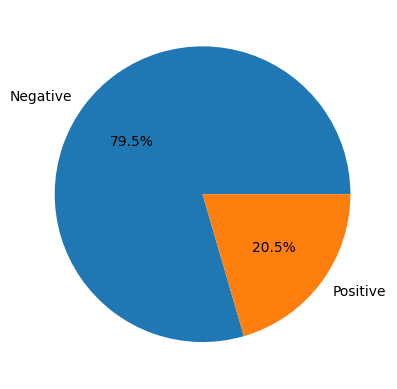

In [ ]:
import matplotlib.pyplot as plt

plt.pie(df['SentimentBert'].value_counts(), labels=df['SentimentBert'].value_counts().index, autopct='%1.1f%%')